## Lambda Functions

Let's consider a function `compute(array, function)` that can process data for us with a function that we provide.

In [1]:
def compute(array, function):

    new_array = []

    for base_element in array:
        
        new_element = function(base_element)
        new_array.append(new_element)

    return new_array

In [2]:
input_array = [1,2,5,10,1,2]

We can provide `math.sqrt()` function as an argument for `compute()` function so that it applies `sqrt()` to all the elements of the given array.<br>(Notice that we only pass a name of the function without parenteses.)

In [3]:
import math
output = compute(input_array, math.sqrt)
output

[1.0,
 1.4142135623730951,
 2.23606797749979,
 3.1622776601683795,
 1.0,
 1.4142135623730951]

We can create our own function with the name we desire.

In [4]:
def add_one_and_square_it_man(variable):
    return (variable+1)**2


And then pass it's name as an argument to `compute()`.

In [5]:
output = compute(input_array, add_one_and_square_it_man)
output

[4, 9, 36, 121, 4, 9]

But that's a lot of typing! So we can specify the function on the fly (inline) like this.

In [6]:
output = compute(input_array, lambda x: (x+1)**2)
output

[4, 9, 36, 121, 4, 9]

In [7]:
output = compute(input_array, lambda x: -1/x)
output

[-1.0, -0.5, -0.2, -0.1, -1.0, -0.5]

U can also give a name to your lambda, it's equivalent to defining a function the regular way.

In [8]:
log_of_square = lambda x: math.log(x**2)

And use it with it's name.

In [9]:
output = log_of_square(17)
output

5.666426688112432

Or pass its name as an argument.

In [10]:
output = compute(input_array, log_of_square)
output

[0.0,
 1.3862943611198906,
 3.2188758248682006,
 4.605170185988092,
 0.0,
 1.3862943611198906]

We can also specify lambdas (like normal functions) with several arguments.

In [11]:
do_stuff = lambda x, y: x**2 - math.sqrt(y)

In [12]:
returned_value = do_stuff(2,4)
returned_value

2.0

We can do some more complicated stuff as well. Like we specify a function that takes a two-argument function as its argument and pass one of arguments to the inner function.<br>Did I just win the contest of obfuscated comments? :)

Let's just check what it does.

In [13]:
def compute_with_number(array, function, number):

    new_array = []

    for x in array:
        new_array.append(function(x, number))
    
    return new_array


We pass an array, a function and a number as arguments.

In [14]:
result = compute_with_number([3,4,1,2,17], do_stuff, 16)
result

[5.0, 12.0, -3.0, 0.0, 285.0]

We can also pass an inline lambda instead of named function.

In [15]:
result = compute_with_number([3,4,1,2,17], lambda x,y: x+y, 5)
result

[8, 9, 6, 7, 22]

Let's go crazy.

In [16]:
result = compute_with_number([3,4,1,2,17], lambda x,y: 2*x**3/y + y, 10)
result

[15.4, 22.8, 10.2, 11.6, 992.6]

And now some really crazy stuff. :]

In [17]:
def apply_composition_of_functions(dataset, function1, function2, function3):
    return [function3(function2(function1(element))) for element in dataset]

In [18]:
import numpy as np
data = np.random.randint(-10,10,size=20)
data

array([  1, -10,  -6,   6,  -5,  -5,   7,   0, -10,   1,   9,  -3,   5,
        -8,  -9,   4,  -7,   4,   3,  -4])

We feed our `apply_composition_of_functions()` function with the following arguments:
- dataset it's supposed to operate on,
- function#1 which it's supposed to apply to each element,
- function#2 which it's supposed to apply to computated value of function#1,
- function#3 which it's supposed to apply to computated value of function#2.

And we do it with lambdas, why waste time definig these functions if we're only gonna use them once?

In [19]:
processed_data = apply_composition_of_functions(
                        data,
                        lambda x: x**2+1,
                        lambda x: np.log(x),
                        lambda x: x**3+2*x**2-4*x+2
                    )
processed_data

[0.5213419575855511,
 124.43720166306838,
 60.71556180698277,
 60.71556180698277,
 44.78332368016214,
 44.78332368016214,
 76.8290587100457,
 2.0,
 124.43720166306838,
 0.5213419575855511,
 108.7863222011779,
 15.601527402741478,
 44.78332368016214,
 92.89429234965803,
 108.7863222011779,
 29.46382308064108,
 76.8290587100457,
 29.46382308064108,
 15.601527402741478,
 29.46382308064108]

Let's plot this shit!

In [61]:
args = np.arange(-1.5,1.5,0.01)
vals = apply_composition_of_functions(
                        args,
                        lambda x: x**2+1,
                        lambda x: np.log(x),
                        lambda x: x**3+2*x**2-4*x+2
                    )

In [62]:
import seaborn as sns

<AxesSubplot:>

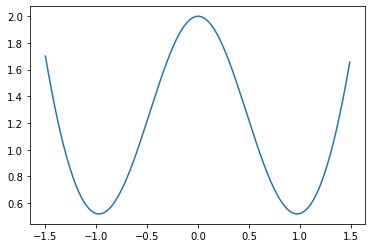

In [63]:
sns.lineplot(x = args, y = vals)

Well, tbh I hoped it's gonna be uglier. Let's try something else! :]

In [59]:
args = np.arange(-1.5,2.5,0.01)
vals = apply_composition_of_functions(
    args,
    lambda x: x**5 - 8*x**3 + 10*x + 6,
    lambda x: x/2,
    lambda x: x**3
)

<AxesSubplot:>

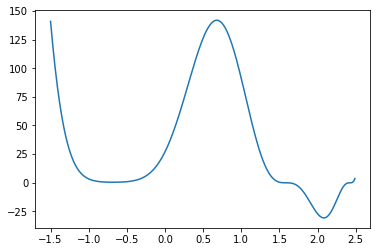

In [60]:
sns.lineplot(x = args, y = vals)

## PROFIT!

And it's not even my final form...